In [1]:
from sklearn.metrics import mean_squared_error
import pandas as pd
# import math
import numpy as np
import autosklearn.regression

In [2]:
import matplotlib.pyplot as plt

In [3]:
from alibi.explainers import ALE, plot_ale

In [16]:
df = pd.read_csv("../raw_data/20221026/df.ami.elderly.daily.csv")
# df = df[df["year"] <= 2019]
train_len = int(len(df) * .8)
test = df[train_len:]
df = df[:train_len]

In [17]:
len(df)

2044

In [18]:
df.dtypes

Unnamed: 0                        int64
Attendance.Date..yyyy.mm.dd.     object
n                                 int64
year                              int64
month                             int64
Day                               int64
Mean (deg. C)                   float64
Mean Relative Humidity (%)        int64
CO                              float64
FSP                             float64
NO2                             float64
NOX                             float64
O3                              float64
RSP                             float64
SO2                             float64
total                             int64
dtype: object

In [19]:
df.drop(["Unnamed: 0", "year", "month", "Day", "Attendance.Date..yyyy.mm.dd."], axis = 1).dtypes
df[["n"]].dtypes

n    int64
dtype: object

# autosklearn

In [20]:
X_train = df[[
    "FSP", "RSP", "SO2", "O3", "NO2", "NOX",
               "total", 
               "Mean (deg. C)", "Mean Relative Humidity (%)"
]]
feature_names = X_train.columns
y_train = df[["n"]]
X_train = np.array(X_train)

In [21]:
aml = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task = 120
)
aml.fit(X_train, y_train)

AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     per_run_time_limit=12, time_left_for_this_task=120)

In [22]:
ale = ALE(aml.predict, feature_names = feature_names, target_names = ["n"])

In [23]:
aml_exp = ale.explain(X_train)

array([[<AxesSubplot:xlabel='FSP', ylabel='ALE'>,
        <AxesSubplot:xlabel='RSP', ylabel='ALE'>,
        <AxesSubplot:xlabel='SO2', ylabel='ALE'>],
       [<AxesSubplot:xlabel='O3', ylabel='ALE'>,
        <AxesSubplot:xlabel='NO2', ylabel='ALE'>,
        <AxesSubplot:xlabel='NOX', ylabel='ALE'>],
       [<AxesSubplot:xlabel='total', ylabel='ALE'>,
        <AxesSubplot:xlabel='Mean (deg. C)', ylabel='ALE'>,
        <AxesSubplot:xlabel='Mean Relative Humidity (%)', ylabel='ALE'>]],
      dtype=object)

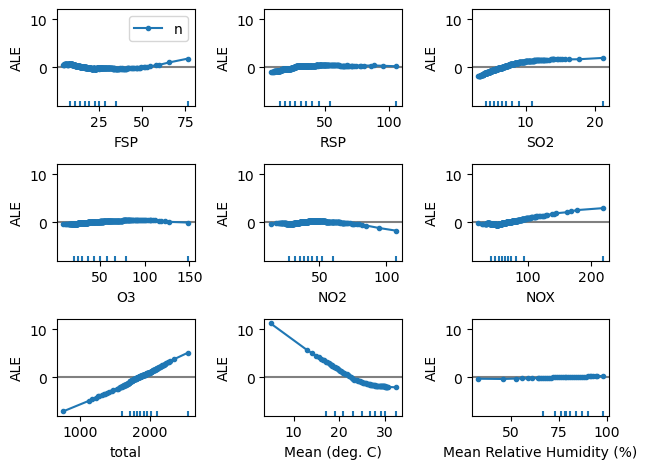

In [24]:
plot_ale(aml_exp)

In [1]:
plot_ale(aml_exp, ["FSP"])

NameError: name 'plot_ale' is not defined